0.9119879710482145


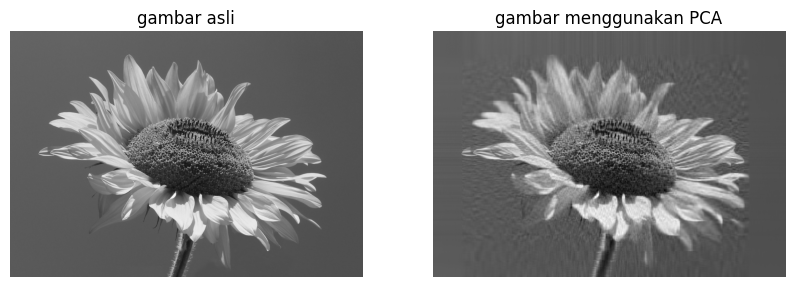

In [1]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#muat gambar dalam greyscale
image = cv2.imread('C:/Users/user/OneDrive/Pictures/Sunflower_from_Silesia2.jpg', cv2.IMREAD_GRAYSCALE)


if image is None:
    raise ValueError("Image not found or could not be loaded!")

#normalize gambar
image = image / 255.0

#rubah gambar menjadi 2D
h, w = image.shape
image_reshaped = image.reshape(h, w)

#data standarisasi
scaler = StandardScaler()
image_standardized = scaler.fit_transform(image_reshaped)

#menerapkan PCA
n_components = 50  
pca = PCA(n_components=n_components)
transformed = pca.fit_transform(image_reshaped)
print(sum(pca.explained_variance_ratio_))

#rekontruksi gambar dari PCA
reconstructed = pca.inverse_transform(transformed)

#ubah skala gambar menjadi 0=255
reconstructed = np.clip(reconstructed * 255, 0, 255).astype(np.uint8)

#tampilkan gambar asli dan rekontruksi menggunakan PCA
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('gambar asli')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(reconstructed, cmap='gray')
plt.title('gambar menggunakan PCA')
plt.axis('off')

plt.show()


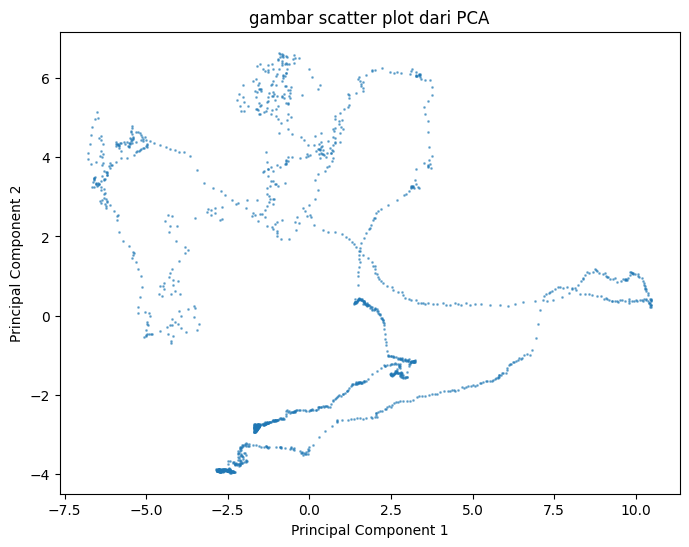

In [10]:
# Scatter plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(transformed[:, 0], transformed[:, 1], alpha=0.5, s=1)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("gambar scatter plot dari PCA")
plt.show()

Eigenvalues: [14.07181279 10.39026691  5.31776232  3.8381214   2.24978404  1.38786339
  1.25300635  1.18768351  0.86220304  0.78504813  0.63774044  0.59930928
  0.55327192  0.497325    0.43537076  0.43411518  0.36138127  0.35461737
  0.33352602  0.31048597  0.28790044  0.27221279  0.26825647  0.25944122
  0.22546412  0.21434873  0.20499895  0.1939374   0.19087913  0.17584908
  0.16996844  0.16704122  0.16272852  0.15485431  0.14760665  0.14527468
  0.14165866  0.13520098  0.13142003  0.12842824  0.12523776  0.12253549
  0.11710058  0.11633071  0.10840538  0.10565914  0.09634985  0.09497886
  0.09229288  0.08978286]


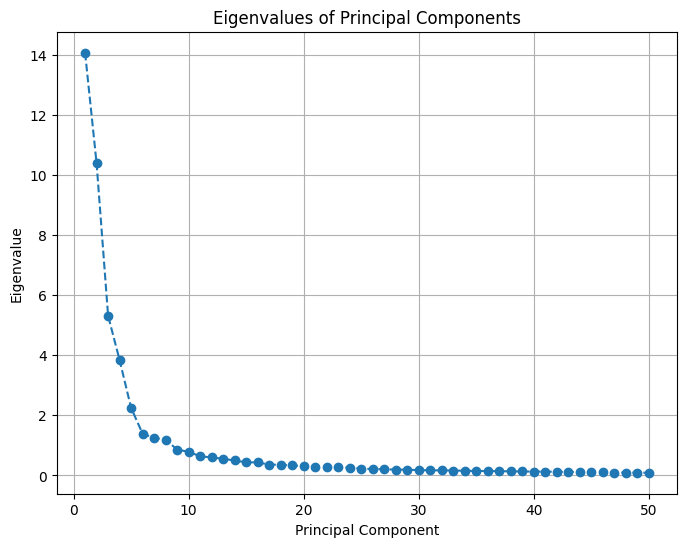

    Principal Component  Eigenvalue
0                     1   14.071813
1                     2   10.390267
2                     3    5.317762
3                     4    3.838121
4                     5    2.249784
5                     6    1.387863
6                     7    1.253006
7                     8    1.187684
8                     9    0.862203
9                    10    0.785048
10                   11    0.637740
11                   12    0.599309
12                   13    0.553272
13                   14    0.497325
14                   15    0.435371
15                   16    0.434115
16                   17    0.361381
17                   18    0.354617
18                   19    0.333526
19                   20    0.310486
20                   21    0.287900
21                   22    0.272213
22                   23    0.268256
23                   24    0.259441
24                   25    0.225464
25                   26    0.214349
26                   27    0

In [11]:
import pandas as pd

# Nilai Eigenvalues
eigen_values = pca.explained_variance_
print("Eigenvalues:", eigen_values)

# Plot Eigenvalues
plt.figure(figsize=(8,6))
plt.plot(range(1, len(eigen_values)+1), eigen_values, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues of Principal Components")
plt.grid()
plt.show()


# Simpan nilai eigenvalues ke dalam DataFrame
df = pd.DataFrame({'Principal Component': range(1, len(eigen_values) + 1),'Eigenvalue': eigen_values})

# Menampilkan tabel
print(df)